## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [8]:
#3 Look at the data types of the columns
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [9]:
#4 Check for missing  values if any, replace with appropriate values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [10]:
#5 Prepare  X (independent variables) and y (dependent variable)
X = df.drop(columns=["price"])
y = df["price"]
# Display first few rows of X and y
X.head(), y.head()

(   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
 0  7420         4          2        3      yes        no       no   
 1  8960         4          4        4      yes        no       no   
 2  9960         3          2        2      yes        no      yes   
 3  7500         4          2        2      yes        no      yes   
 4  7420         4          1        2      yes       yes      yes   
 
   hotwaterheating airconditioning  parking prefarea furnishingstatus  
 0              no             yes        2      yes        furnished  
 1              no             yes        3       no        furnished  
 2              no              no        2      yes   semi-furnished  
 3              no             yes        3      yes        furnished  
 4              no             yes        2       no        furnished  ,
 0    13300000
 1    12250000
 2    12250000
 3    12215000
 4    11410000
 Name: price, dtype: int64)

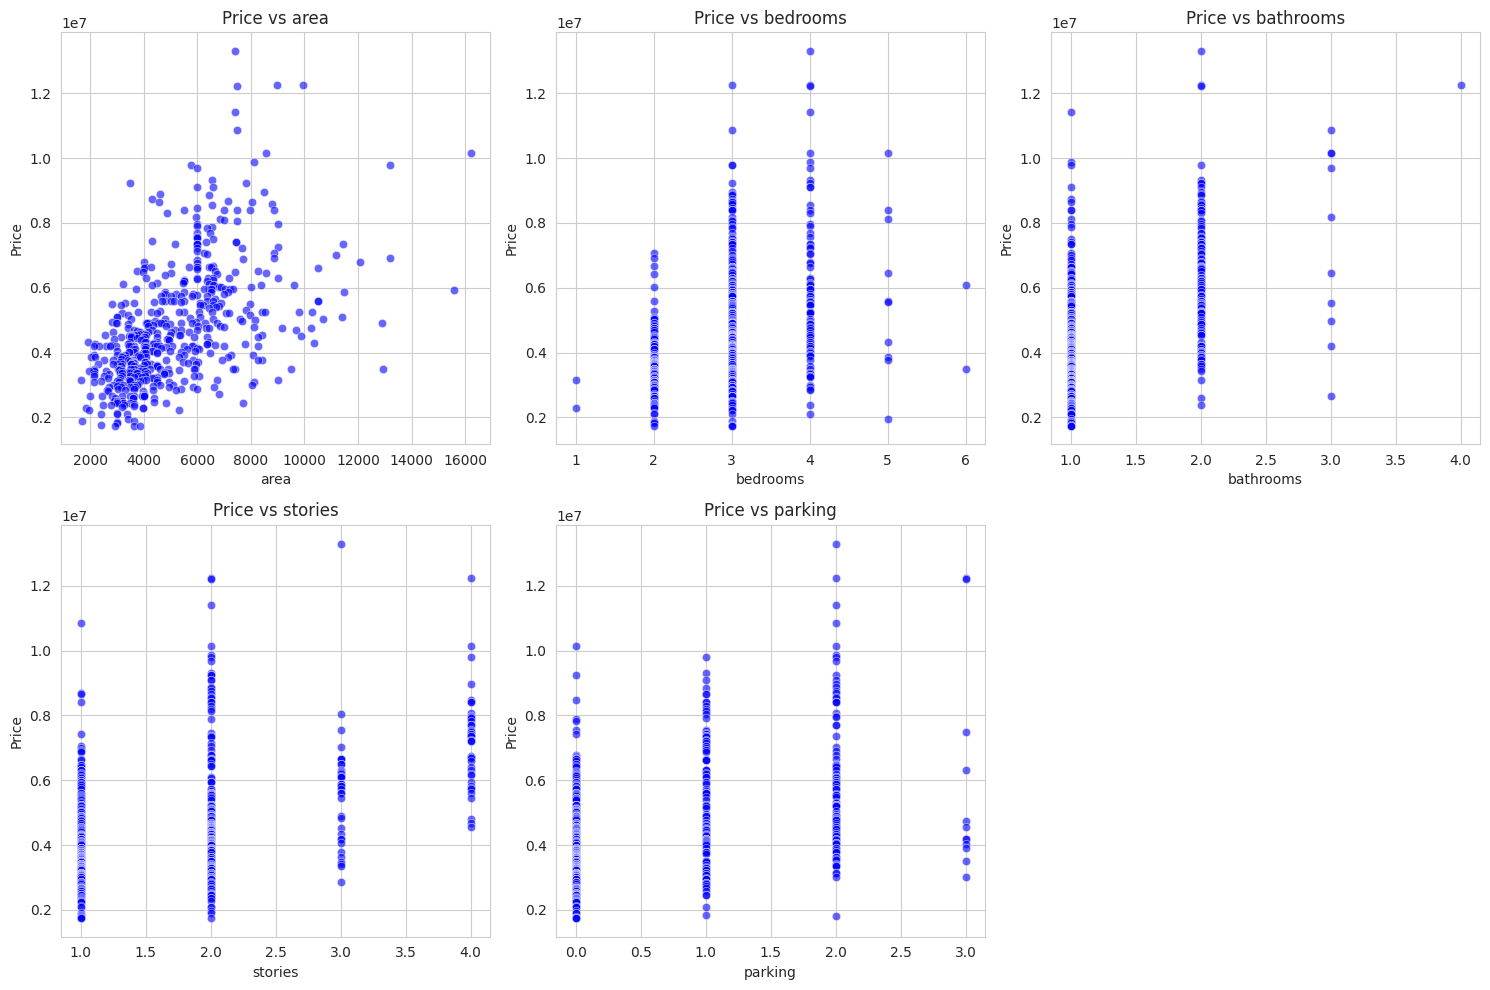

In [11]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot style
sns.set_style("whitegrid")
# Select numerical features for scatterplots
numerical_features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
# Create scatterplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=X[feature], y=y, alpha=0.6,color='blue')
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(f"Price vs {feature}")
plt.tight_layout()
plt.show()

In [12]:
#7 Encoding categorical data in X
X = pd.get_dummies(X, drop_first=True)
print(X.head())

   area  bedrooms  bathrooms  stories  parking  mainroad_yes  guestroom_yes  \
0  7420         4          2        3        2          True          False   
1  8960         4          4        4        3          True          False   
2  9960         3          2        2        2          True          False   
3  7500         4          2        2        3          True          False   
4  7420         4          1        2        2          True           True   

   basement_yes  hotwaterheating_yes  airconditioning_yes  prefarea_yes  \
0         False                False                 True          True   
1         False                False                 True         False   
2          True                False                False          True   
3          True                False                 True          True   
4          True                False                 True         False   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0      

In [13]:
#7 Encoding categorical data
import pandas as pd
df=pd.read_csv("Housing.csv")
X=df.drop(columns=['price'])
cc=X.select_dtypes(include=['object']).columns
print(cc)
X = pd.get_dummies(X, columns=cc,drop_first=True)
print(X.head())

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')
   area  bedrooms  bathrooms  stories  parking  mainroad_yes  guestroom_yes  \
0  7420         4          2        3        2          True          False   
1  8960         4          4        4        3          True          False   
2  9960         3          2        2        2          True          False   
3  7500         4          2        2        3          True          False   
4  7420         4          1        2        2          True           True   

   basement_yes  hotwaterheating_yes  airconditioning_yes  prefarea_yes  \
0         False                False                 True          True   
1         False                False                 True         False   
2          True                False                False          True   
3          True                False                 True          True   
4     

In [14]:
#8  Avoiding the Dummy Variable Trap
import pandas as pd
from sklearn.preprocessing import StandardScaler 
X = pd.get_dummies(X, drop_first=True)
print("Columns after encoding and avoiding dummy variable trap:\n", X.columns)

Columns after encoding and avoiding dummy variable trap:
 Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes',
       'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')


In [15]:
#9 Apply feature scaling on numerical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(pd.DataFrame(X_scaled,columns=X.columns).head())

       area  bedrooms  bathrooms   stories   parking  mainroad_yes  \
0  1.046726  1.403419   1.421812  1.378217  1.517692      0.405623   
1  1.757010  1.403419   5.405809  2.532024  2.679409      0.405623   
2  2.218232  0.047278   1.421812  0.224410  1.517692      0.405623   
3  1.083624  1.403419   1.421812  0.224410  2.679409      0.405623   
4  1.046726  1.403419  -0.570187  0.224410  1.517692      0.405623   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0      -0.465315     -0.734539            -0.219265             1.472618   
1      -0.465315     -0.734539            -0.219265             1.472618   
2      -0.465315      1.361397            -0.219265            -0.679063   
3      -0.465315      1.361397            -0.219265             1.472618   
4       2.149083      1.361397            -0.219265             1.472618   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0      1.804941                        -0

In [16]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [17]:
#11 Fitting Multiple Linear Regression to the Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_train_pred = model.predict(X_train)
train_errors = y_train - y_train_pred

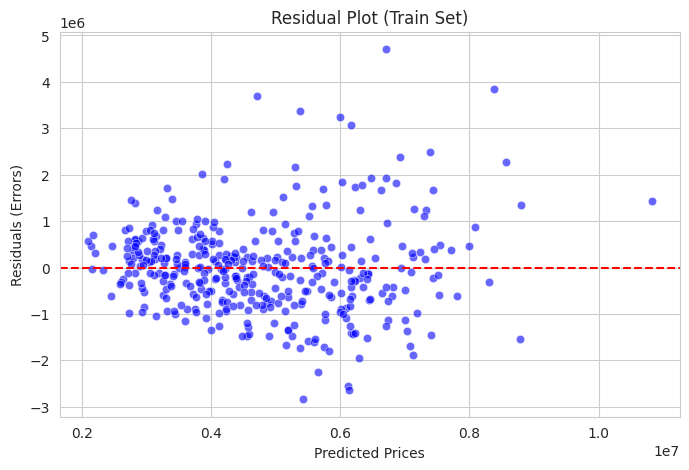

In [19]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train_pred, y=train_errors, alpha=0.6,color="blue")
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot (Train Set)")
plt.show()

In [20]:
#14  Predic on the test set
y_test_pred = model.predict(X_test)
test_errors = y_test - y_test_pred

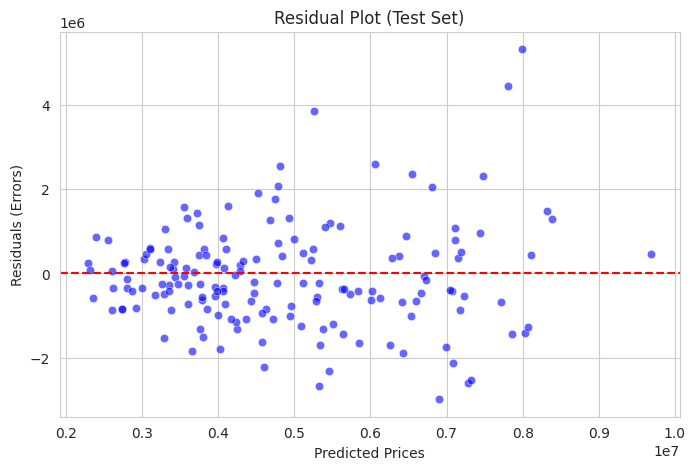

In [21]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=test_errors, alpha=0.6,color="blue")
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot (Test Set)")
plt.show()

In [22]:
#16 Print Mean Squared Error and R Squared Value
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Value: {r2:.4f}")

Mean Squared Error: 1523019469501.29
R-squared Value: 0.6463


In [23]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)
def adjusted_r2(X, y, model):
    n = len(y)  # Number of data points
    p = X.shape[1]  # Number of features
    r2 = model.score(X, y)  # R² value
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))  # Adjusted R² formula
    return adj_r2

adj_r2_train = adjusted_r2(X_train, y_train, model)
adj_r2_test = adjusted_r2(X_test, y_test, model)

print(f"Adjusted R² (Train): {adj_r2_train:.4f}")
print(f"Adjusted R² (Test): {adj_r2_test:.4f}")

Adjusted R² (Train): 0.6823
Adjusted R² (Test): 0.6157
